In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = pd.read_csv('../data/VK.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')
data['Price'] = data['Price'].str.replace('.','').str.replace(',','.').astype(float)
data['Change'] = data['Price']/data['Price'].shift(1) - 1
change_std = data['Change'].std()
change_mean = data['Change'].mean()
print('STD: '+(str)(change_std)+'\n'+'MEAN: '+(str)(change_mean))

STD: 0.03813414766302712
MEAN: -0.0008746281296125419


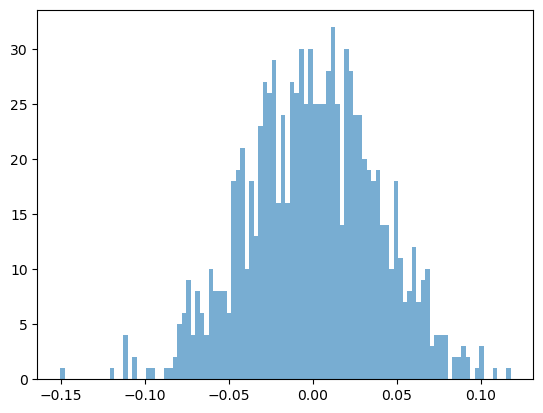

In [64]:
x = np.random.normal(change_mean,change_std,1000)
plt.hist(x,bins=100,alpha=0.6)
plt.show()

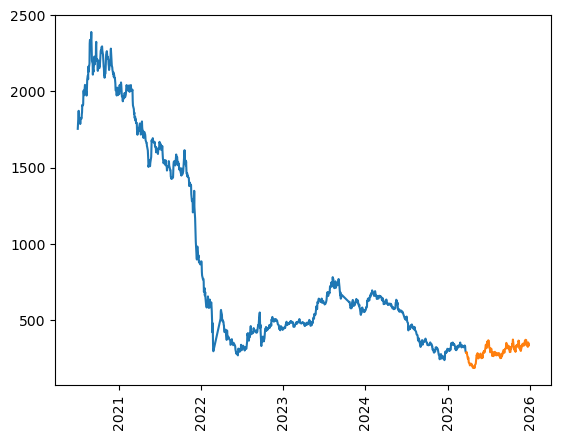

In [66]:
num_models = 200
model = num_models*[0]
model[0] = (1+np.random.normal(change_mean, change_std)) * data.loc[len(data)-1]['Price']

for i in range(1,num_models):
    model[i] = (1+np.random.normal(change_mean, change_std)) * model[i-1]

plt.xticks(rotation='vertical')

plt.plot(data['Date'],data['Price'])
plt.plot(pd.date_range(start=data.loc[len(data)-1]['Date']+pd.Timedelta(days=1), periods=num_models, freq='B'),model)
plt.show()